# 1D Gaussian SDE and ODE- forwards and backwards
這邊只做一個$p_0\sim\mathcal{N}(3,5)$版本的

## Parameters setting

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from random import sample

In [10]:
beta=0.7
sigma=1.0
T=20.0
t_target=10.0
M=1000  #number of trials

w=0.55  #mixture
mu0= 3.0
s0 = np.sqrt(5)
#mu2=2.0
#s2=0.9

K_traj=32  #trajectories 數量
N_part=6000 #估計pdf形狀的OU粒子數

seed=0
rng = np.random.default_rng(seed)

# At t=T
mean_T = np.exp(-beta*T)*mu0
sigma_T_square = np.exp(-2.0*beta*T)*(s0**2)+ (1-np.exp(-2.0*beta*T))*(sigma**2)/(2.0*beta)
sigma_T = np.sqrt(sigma_T_square)
mean_inf = 0.0
sigma_inf = np.sqrt(sigma**2/(2.0*beta))

In [17]:
def plot(time, X_0, N, height_0, height_M, pdf_0, pdf_M, y):
    f, (a2, a0, a1) = plt.subplots(1, 3, figsize=(10, 3), gridspec_kw={'width_ratios': [1, 10, 1]})
    for ii in sample(range(N), 20):
        a0.plot(time, X_0[ii,:])

    imax = np.argmax(X_0[:,M])
    a0.plot(time, X_0[imax,:])
    imin = np.argmin(X_0[:,M])
    a0.plot(time, X_0[imin,:])
    imax = np.argmax(X_0[:,0])
    a0.plot(time, X_0[imax,:])
    imin = np.argmin(X_0[:,0])
    a0.plot(time, X_0[imin,:])


    a2.scatter(X_0[:,0]*0-height_0, X_0[:,0], s=10.0)
    a2.plot(pdf_0, y)
    a2.set_xlim(-height_0*2, height_0*2)
    a2.set_ylim(-10, 10)
    a2.set_xticklabels([])
    a2.set_yticklabels([])

    a0.set_xlim(0, T)
    a0.set_ylim(-10, 10)
    a0.set(xlabel='t')
    a0.set(title='X(t)')

    a1.scatter(X_0[:,M]*0-height_M, X_0[:,M], s=10.0)
    a1.plot(pdf_M, y)
    a1.set_xlim(-height_M*2, height_M*2)
    a1.set_ylim(-10, 10)
    a1.set_xticklabels([])
    a1.set_yticklabels([])

    f.tight_layout()
    plt.show()
    

## 1. SDE forward

In [ ]:
def OU_forward(beta, sigma, mu_0, sigma_0, theo_mean, theo_std, T, N, M):
    dt=5e-3  #時間步長
    time = np.linspace(0, T, M+1)

    # Euler-Maruyama method:
    X_0 = np.zeros((N, M+1))

    # sample initial condition from N(mu, s0^2)
    X_0[:,0] = np.random.randn(N)*sigma_0 + mu_0

    # iteration
    for ii in range(M):
        X_0[:, ii+1] = X_0[:, ii] - beta*dt*X_0[:, ii] + sigma*np.sqrt(dt)*np.random.randn(N)

    # maximum likelihood estimation at t= T
    mean_M = np.mean(X_0[:,M])
    std_M = np.std(X_0[:,M])

    # The corresponding normal distribution
    y = np.linspace(-10, 10, 100)

    # at t=0
    height_0 = 1.0/sigma_0/np.sqrt(2.0*np.pi)
    pdf_0 = np.exp(-0.5*((y-mu_0)/sigma_0)**2)*height_0

    # at t=T
    height_M = 1.0/std_M/np.sqrt(2.0*np.pi)
    pdf_M = np.exp(-0.5*((y-mean_M)/std_M)**2)*height_M

    print('The left panel shows the initial sampling at X(t=0).')
    print('')
    print('The right panel shows the results at X(t=T) and its maximum likelihood estimation (MLE).')
    print('MLE:')
    print('meam = ', mean_M)
    print('std = ', std_M)
    print('')
    print('Theoretical results:')
    print('Theoretical meam = ', theo_mean)
    print('Theoretical std = ', theo_std)

    plot(time, X_0, N, height_0, height_M, pdf_0, pdf_M, y)



The left panel shows the initial sampling at X(t=0).

The right panel shows the results at X(t=T) and its maximum likelihood estimation (MLE).
MLE:
meam =  0.07153109929196542
std =  0.8572454630839407

Theoretical results:
Theoretical meam =  2.494586157310704e-06
Theoretical std =  0.8451542547302697


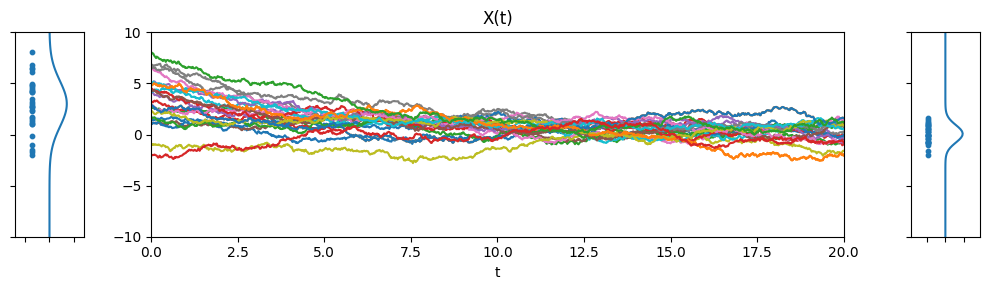

In [22]:
OU_forward(beta, sigma, mu0, s0, mean_T, sigma_T, T, K_traj, M)